In [1]:
using StaticArrays
using LinearAlgebra
# using Makie
using GLMakie 
using LsqFit
include("Elastic.jl")
using .Elastic
using DelimitedFiles
using Distributions
using Statistics
using Plots
using Test
using IterTools
using BenchmarkTools

In [17]:
atom_positions = [
    Vector([0.0, 0.0, 0.0]),
    Vector([0.0, 0.5, 0.5]),
    Vector([0.5, 0.0, 0.5]),
    Vector([0.5, 0.5, 0.0]),
    Vector([1.0, 0.0, 0.0]),
    Vector([0.0, 1.0, 0.0]),
    Vector([0.0, 0.0, 1.0]),
    Vector([0.5, 1.0, 0.5]),
    Vector([1.0, 0.5, 0.5]),
    Vector([0.5, 0.5, 1.0]),
    Vector([1.0, 0.0, 1.0]),
    Vector([1.0, 1.0, 0.0]),
    Vector([0.0, 1.0, 1.0]),
    Vector([1.0, 1.0, 1.0])
] 
kb=8.617332385e-5 #eV/K
amuM=1.03642701e-4 #[m]/amu
Mcu=63.546 #amu
lattice_constant = 3.61 #A

# 定义铜的FCC晶胞的基矢量
lattice_vectors = collect((Matrix([
    lattice_constant 0.0 0.0; #a1
    0.0 lattice_constant 0.0; #a2
    0.0 0.0 lattice_constant] #a3
))')

# 创建铜的原子列表
atoms = [Atom(pos,Mcu*amuM) for pos in atom_positions]


cell=UnitCell(lattice_vectors,atoms)
cpcell=copycell(cell,2,2,2)
fcell=filtercell(cpcell)
visualize_unitcell_atoms(fcell)

In [18]:
fcell

UnitCell([3.61 0.0 0.0; 0.0 3.61 0.0; 0.0 0.0 3.61], Atom[Atom([-2.0, -2.0, -2.0], [0.0, 0.0, 0.0], 65.86079077746, 8, [1, 1, 1]), Atom([-2.0, -2.0, -1.0], [0.0, 0.0, 0.0], 65.86079077746, 4, [1, 1, 0]), Atom([-2.0, -2.0, 0.0], [0.0, 0.0, 0.0], 65.86079077746, 4, [1, 1, 0]), Atom([-2.0, -2.0, 1.0], [0.0, 0.0, 0.0], 65.86079077746, 4, [1, 1, 0]), Atom([-2.0, -1.0, -2.0], [0.0, 0.0, 0.0], 65.86079077746, 4, [1, 0, 1]), Atom([-2.0, -1.0, -1.0], [0.0, 0.0, 0.0], 65.86079077746, 2, [1, 0, 0]), Atom([-2.0, -1.0, 0.0], [0.0, 0.0, 0.0], 65.86079077746, 2, [1, 0, 0]), Atom([-2.0, -1.0, 1.0], [0.0, 0.0, 0.0], 65.86079077746, 2, [1, 0, 0]), Atom([-2.0, 0.0, -2.0], [0.0, 0.0, 0.0], 65.86079077746, 4, [1, 0, 1]), Atom([-2.0, 0.0, -1.0], [0.0, 0.0, 0.0], 65.86079077746, 2, [1, 0, 0])  …  Atom([1.5, -0.5, 0.0], [0.0, 0.0, 0.0], 65.86079077746, 1, [0, 0, 0]), Atom([1.5, -0.5, 1.0], [0.0, 0.0, 0.0], 65.86079077746, 1, [0, 0, 0]), Atom([1.5, 0.5, -2.0], [0.0, 0.0, 0.0], 65.86079077746, 2, [0, 0, 1]), At

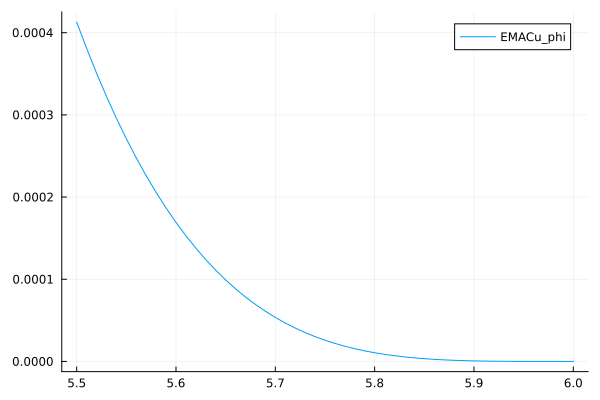

In [3]:
x=5.5:0.01:6.0
Plots.plot(x,EMACu_psi.(x),label="EMACu_phi")

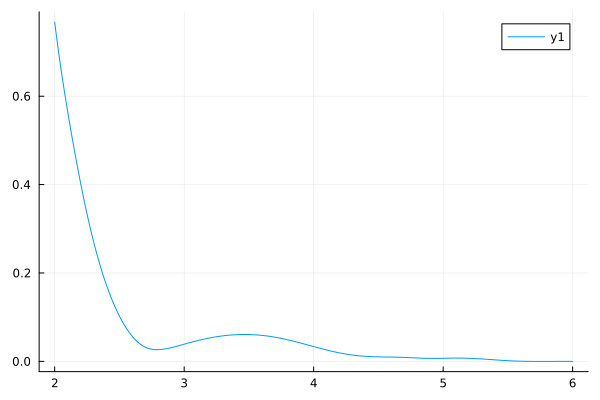

In [4]:
ct=6.0
embeddingCu=Embedding(embedding_energyCu, embedding_forceCui)
interaction=Interaction(EMACu_phi, EMACu_phi_gradient, ct, 0.1,embeddingCu)
xx=2.0:0.001:6.0
y=interaction.cutenergy.(xx)
Plots.plot(xx,y)

In [5]:
cell_energy(fcell,interaction)

-840.2721080506107

In [6]:
pressure_int(fcell,interaction)

0.0262033685860635657956798078218917312242359649547069241172325150097401607986282

In [7]:
dUdhij(fcell,interaction,BigFloat("1e-5"))

3×3 Matrix{Float64}:
 -8.21002e-6  -2.29893e-7  -2.34617e-7
 -2.4249e-7   -8.21631e-6  -2.36191e-7
 -2.39341e-7  -2.37766e-7  -8.21317e-6

In [8]:
cl,El=minimizeEnergy!(fcell, interaction,rg=[3.2,4.0])

(3.2:0.0008008008008008008:4.0, [3794.262499476229, 3753.193378630577, 3712.445644534438, 3672.0170676549415, 3631.9054321016, 3592.1085355390896, 3552.6241890919837, 3513.4502173004885, 3474.5844580294524, 3436.024763217276  …  -751.1099471079158, -750.7519713096042, -750.3933347870443, -750.0340407988829, -749.6740926706702, -749.3134937872018, -748.9522475894032, -748.5903575818201, -748.2278273273353, -747.864660443751])

In [13]:
force_tensor(fcell,interaction)

3×3 Matrix{Float64}:
 -4.44977e-18  -3.57072e-18  -3.66755e-18
  1.17678e-19  -3.39505e-18   1.17425e-18
 -3.67717e-20  -8.11098e-20   3.84867e-20

In [14]:
dUdhij(fcell,interaction)

3×3 Matrix{Float64}:
 -3.56322e-6  -2.96805e-8  -3.28047e-8
 -4.21775e-8  -3.41794e-6  -2.96805e-8
 -3.5929e-8   -3.90533e-8  -3.41169e-6

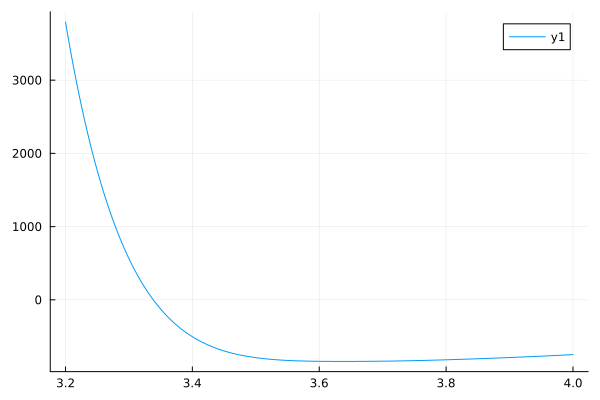

In [12]:
Plots.plot(cl,El)
# Plots.ylims!(0,20000.0)

In [11]:
argmin(El)

549

In [12]:
fcell

UnitCell([3.6388388388388386 0.0 0.0; 0.0 3.6388388388388386 0.0; 0.0 0.0 3.6388388388388386], Atom[Atom([-2.0, -2.0, -2.0], [0.0, 0.0, 0.0], 1.0, 8, [1, 1, 1]), Atom([-2.0, -2.0, -1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-2.0, -2.0, 0.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-2.0, -2.0, 1.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 1, 0]), Atom([-2.0, -1.0, -2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 0, 1]), Atom([-2.0, -1.0, -1.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-2.0, -1.0, 0.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-2.0, -1.0, 1.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0]), Atom([-2.0, 0.0, -2.0], [0.0, 0.0, 0.0], 1.0, 4, [1, 0, 1]), Atom([-2.0, 0.0, -1.0], [0.0, 0.0, 0.0], 1.0, 2, [1, 0, 0])  …  Atom([1.5, -0.5, 0.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([1.5, -0.5, 1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([1.5, 0.5, -2.0], [0.0, 0.0, 0.0], 1.0, 2, [0, 0, 1]), Atom([1.5, 0.5, -1.0], [0.0, 0.0, 0.0], 1.0, 1, [0, 0, 0]), Atom([1.5, 0.5, 0.0], [0.0, 0.0, 0.0], 1.0,

In [73]:
El[129]

-694.3693969476806

8.617332385e-5